#Import the libraries

In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

#Read data

In [211]:
data=pd.read_csv('updated_dataset.csv',encoding='ISO-8859-1')
data

,S.no.,Name of State,Name of District,Recharge from rainfall During Monsoon Season,Recharge from other sources During Monsoon Season,Recharge from rainfall During Non Monsoon Season,Recharge from other sources During Non Monsoon Season,Total Annual Ground Water Recharge,Total Natural Discharges,Annual Extractable Ground Water Resource,Current Annual Ground Water Extraction For Irrigation,Current Annual Ground Water Extraction For Domestic & Industrial Use,Total Current Annual Ground Water Extraction,Annual GW Allocation for Domestic Use as on 2025,Net Ground Water Availability for future use,Stage of Ground Water Extraction (%)
0,1,ANDHRA PRADESH,Anantapur,89200.23,46136.12,1013.97,50415.31,186765.62,9338.31,177427.31,142953.85,14884.94,157838.79,21623.75,59410.09,88.96
1,2,ANDHRA PRADESH,Chittoor,115718.55,32389.60,1204.19,38028.60,187340.94,9367.06,177973.88,95256.50,9597.29,104853.79,13528.83,80858.36,58.92
2,3,ANDHRA PRADESH,East Godavari,104140.05,95383.56,3714.55,50847.53,254085.69,12704.33,241381.36,41688.32,9418.15,51106.47,4226.85,193656.03,21.17
3,4,ANDHRA PRADESH,Guntur,52942.86,57011.90,2547.96,18800.39,131303.10,6565.15,124737.95,39174.72,8942.35,48117.07,14159.10,79051.91,38.57
4,5,ANDHRA PRADESH,Kadapa,93311.68,15869.52,2048.53,11177.61,122407.34,6120.40,116286.94,74888.06,4974.42,79862.47,6110.25,56568.63,68.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,685,LAKSHADWEEP,Kavaratti,124.90,0.00,22.70,0.00,147.60,97.30,50.30,0.00,41.80,41.80,41.80,8.50,83.10
680,686,LAKSHADWEEP,Minicoy,157.60,0.00,27.30,0.00,184.90,121.20,63.70,0.00,38.60,38.60,38.60,25.01,60.60
681,687,Puducherry,Puducherry,7035.00,2738.37,1775.58,3671.63,15220.58,1522.06,13698.52,10338.00,3632.50,13970.50,3652.00,0.00,101.99
682,688,Puducherry,Karaikal,1973.73,4080.47,209.22,880.62,7144.04,714.40,6429.64,616.65,387.67,1004.32,404.52,5408.47,15.62


#Data preprocessing and cleaning

In [212]:
df=data.copy()
df

,S.no.,Name of State,Name of District,Recharge from rainfall During Monsoon Season,Recharge from other sources During Monsoon Season,Recharge from rainfall During Non Monsoon Season,Recharge from other sources During Non Monsoon Season,Total Annual Ground Water Recharge,Total Natural Discharges,Annual Extractable Ground Water Resource,Current Annual Ground Water Extraction For Irrigation,Current Annual Ground Water Extraction For Domestic & Industrial Use,Total Current Annual Ground Water Extraction,Annual GW Allocation for Domestic Use as on 2025,Net Ground Water Availability for future use,Stage of Ground Water Extraction (%)
0,1,ANDHRA PRADESH,Anantapur,89200.23,46136.12,1013.97,50415.31,186765.62,9338.31,177427.31,142953.85,14884.94,157838.79,21623.75,59410.09,88.96
1,2,ANDHRA PRADESH,Chittoor,115718.55,32389.60,1204.19,38028.60,187340.94,9367.06,177973.88,95256.50,9597.29,104853.79,13528.83,80858.36,58.92
2,3,ANDHRA PRADESH,East Godavari,104140.05,95383.56,3714.55,50847.53,254085.69,12704.33,241381.36,41688.32,9418.15,51106.47,4226.85,193656.03,21.17
3,4,ANDHRA PRADESH,Guntur,52942.86,57011.90,2547.96,18800.39,131303.10,6565.15,124737.95,39174.72,8942.35,48117.07,14159.10,79051.91,38.57
4,5,ANDHRA PRADESH,Kadapa,93311.68,15869.52,2048.53,11177.61,122407.34,6120.40,116286.94,74888.06,4974.42,79862.47,6110.25,56568.63,68.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,685,LAKSHADWEEP,Kavaratti,124.90,0.00,22.70,0.00,147.60,97.30,50.30,0.00,41.80,41.80,41.80,8.50,83.10
680,686,LAKSHADWEEP,Minicoy,157.60,0.00,27.30,0.00,184.90,121.20,63.70,0.00,38.60,38.60,38.60,25.01,60.60
681,687,Puducherry,Puducherry,7035.00,2738.37,1775.58,3671.63,15220.58,1522.06,13698.52,10338.00,3632.50,13970.50,3652.00,0.00,101.99
682,688,Puducherry,Karaikal,1973.73,4080.47,209.22,880.62,7144.04,714.40,6429.64,616.65,387.67,1004.32,404.52,5408.47,15.62


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 16 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   S.no.                                                                 684 non-null    int64  
 1   Name of State                                                         684 non-null    object 
 2   Name of District                                                      684 non-null    object 
 3   Recharge from rainfall During Monsoon Season                          684 non-null    float64
 4   Recharge from other sources During Monsoon Season                     684 non-null    float64
 5   Recharge from rainfall During Non Monsoon Season                      684 non-null    float64
 6   Recharge from other sources During Non Monsoon Season                 684 non-null    float64
 7  

In [214]:
df.dropna()

,S.no.,Name of State,Name of District,Recharge from rainfall During Monsoon Season,Recharge from other sources During Monsoon Season,Recharge from rainfall During Non Monsoon Season,Recharge from other sources During Non Monsoon Season,Total Annual Ground Water Recharge,Total Natural Discharges,Annual Extractable Ground Water Resource,Current Annual Ground Water Extraction For Irrigation,Current Annual Ground Water Extraction For Domestic & Industrial Use,Total Current Annual Ground Water Extraction,Annual GW Allocation for Domestic Use as on 2025,Net Ground Water Availability for future use,Stage of Ground Water Extraction (%)
0,1,ANDHRA PRADESH,Anantapur,89200.23,46136.12,1013.97,50415.31,186765.62,9338.31,177427.31,142953.85,14884.94,157838.79,21623.75,59410.09,88.96
1,2,ANDHRA PRADESH,Chittoor,115718.55,32389.60,1204.19,38028.60,187340.94,9367.06,177973.88,95256.50,9597.29,104853.79,13528.83,80858.36,58.92
2,3,ANDHRA PRADESH,East Godavari,104140.05,95383.56,3714.55,50847.53,254085.69,12704.33,241381.36,41688.32,9418.15,51106.47,4226.85,193656.03,21.17
3,4,ANDHRA PRADESH,Guntur,52942.86,57011.90,2547.96,18800.39,131303.10,6565.15,124737.95,39174.72,8942.35,48117.07,14159.10,79051.91,38.57
4,5,ANDHRA PRADESH,Kadapa,93311.68,15869.52,2048.53,11177.61,122407.34,6120.40,116286.94,74888.06,4974.42,79862.47,6110.25,56568.63,68.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,685,LAKSHADWEEP,Kavaratti,124.90,0.00,22.70,0.00,147.60,97.30,50.30,0.00,41.80,41.80,41.80,8.50,83.10
680,686,LAKSHADWEEP,Minicoy,157.60,0.00,27.30,0.00,184.90,121.20,63.70,0.00,38.60,38.60,38.60,25.01,60.60
681,687,Puducherry,Puducherry,7035.00,2738.37,1775.58,3671.63,15220.58,1522.06,13698.52,10338.00,3632.50,13970.50,3652.00,0.00,101.99
682,688,Puducherry,Karaikal,1973.73,4080.47,209.22,880.62,7144.04,714.40,6429.64,616.65,387.67,1004.32,404.52,5408.47,15.62


In [215]:
data.isnull().sum()

S.no.                                                                   0
Name of State                                                           0
Name of District                                                        0
Recharge from rainfall During Monsoon Season                            0
Recharge from other sources During Monsoon Season                       0
Recharge from rainfall During Non Monsoon Season                        0
Recharge from other sources During Non Monsoon Season                   0
Total Annual Ground Water Recharge                                      0
Total Natural Discharges                                                0
Annual Extractable Ground Water Resource                                0
Current Annual Ground Water Extraction For Irrigation                   0
Current Annual Ground Water Extraction For Domestic & Industrial Use    0
Total Current Annual Ground Water Extraction                            0
Annual GW Allocation for Domestic Use 

In [216]:
data.dropna()

,S.no.,Name of State,Name of District,Recharge from rainfall During Monsoon Season,Recharge from other sources During Monsoon Season,Recharge from rainfall During Non Monsoon Season,Recharge from other sources During Non Monsoon Season,Total Annual Ground Water Recharge,Total Natural Discharges,Annual Extractable Ground Water Resource,Current Annual Ground Water Extraction For Irrigation,Current Annual Ground Water Extraction For Domestic & Industrial Use,Total Current Annual Ground Water Extraction,Annual GW Allocation for Domestic Use as on 2025,Net Ground Water Availability for future use,Stage of Ground Water Extraction (%)
0,1,ANDHRA PRADESH,Anantapur,89200.23,46136.12,1013.97,50415.31,186765.62,9338.31,177427.31,142953.85,14884.94,157838.79,21623.75,59410.09,88.96
1,2,ANDHRA PRADESH,Chittoor,115718.55,32389.60,1204.19,38028.60,187340.94,9367.06,177973.88,95256.50,9597.29,104853.79,13528.83,80858.36,58.92
2,3,ANDHRA PRADESH,East Godavari,104140.05,95383.56,3714.55,50847.53,254085.69,12704.33,241381.36,41688.32,9418.15,51106.47,4226.85,193656.03,21.17
3,4,ANDHRA PRADESH,Guntur,52942.86,57011.90,2547.96,18800.39,131303.10,6565.15,124737.95,39174.72,8942.35,48117.07,14159.10,79051.91,38.57
4,5,ANDHRA PRADESH,Kadapa,93311.68,15869.52,2048.53,11177.61,122407.34,6120.40,116286.94,74888.06,4974.42,79862.47,6110.25,56568.63,68.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,685,LAKSHADWEEP,Kavaratti,124.90,0.00,22.70,0.00,147.60,97.30,50.30,0.00,41.80,41.80,41.80,8.50,83.10
680,686,LAKSHADWEEP,Minicoy,157.60,0.00,27.30,0.00,184.90,121.20,63.70,0.00,38.60,38.60,38.60,25.01,60.60
681,687,Puducherry,Puducherry,7035.00,2738.37,1775.58,3671.63,15220.58,1522.06,13698.52,10338.00,3632.50,13970.50,3652.00,0.00,101.99
682,688,Puducherry,Karaikal,1973.73,4080.47,209.22,880.62,7144.04,714.40,6429.64,616.65,387.67,1004.32,404.52,5408.47,15.62


Drop unneeded columns

In [217]:
df.drop(columns=['Recharge from rainfall During Monsoon Season','Recharge from other sources During Monsoon Season','Recharge from rainfall During Non Monsoon Season','Recharge from other sources During Non Monsoon Season'],inplace=True)

Train test split

In [218]:
del df['Name of State']
del df['Name of District']
#del df['Total Annual Ground Water Recharge']
#del df['Annual Extractable Ground Water Resource']
#del df['Current Annual Ground Water Extraction For Irrigation']
#del df['Current Annual Ground Water Extraction For Domestic & Industrial Use']
#del df['Total Current Annual Ground Water Extraction']

In [219]:
X=df[['Total Annual Ground Water Recharge','Total Current Annual Ground Water Extraction','Annual GW Allocation for Domestic Use as on 2025','Current Annual Ground Water Extraction For Domestic & Industrial Use']]
y=df['Net Ground Water Availability for future use']

In [220]:
#X=df.drop('Net Ground Water Availability for future use',axis=1)
#y=df['Net Ground Water Availability for future use']

Data scaling

In [221]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
y=scaler.fit_transform(y.values.reshape(-1,1))

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [223]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(547, 4)
(547, 1)
(137, 4)
(137, 1)


Model Structure

In [224]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=4))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 10)                50        
                                                                 
 dense_37 (Dense)            (None, 10)                110       
                                                                 
 dense_38 (Dense)            (None, 1)                 11        
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [225]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
14/14 [==============================] - 1s 15ms/step - loss: 0.0181 - mean_absolute_error: 0.0787 - val_loss: 0.0140 - val_mean_absolute_error: 0.0685
Epoch 2/50
14/14 [==============================] - 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0630 - val_loss: 0.0103 - val_mean_absolute_error: 0.0621
Epoch 3/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0587 - val_loss: 0.0084 - val_mean_absolute_error: 0.0557
Epoch 4/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0085 - mean_absolute_error: 0.0507 - val_loss: 0.0073 - val_mean_absolute_error: 0.0488
Epoch 5/50
14/14 [==============================] - 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0452 - val_loss: 0.0064 - val_mean_absolute_error: 0.0457
Epoch 6/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0429 - val_loss: 0.0058 - val_mean_absolute_error: 0.0433
Epoch 7/50
14/14 [=========

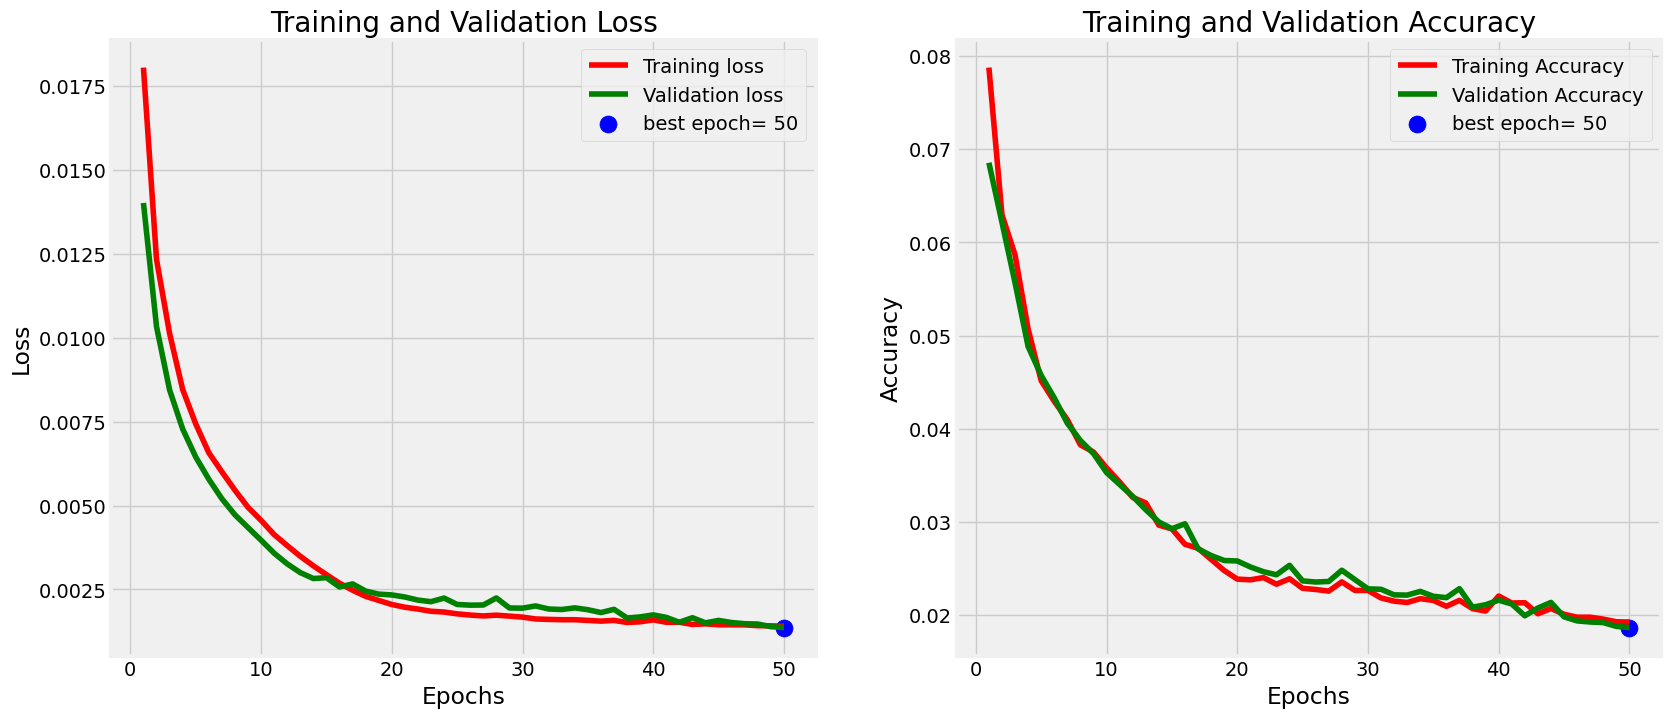

In [226]:
# Define needed variables
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmin(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [227]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [228]:
from sklearn.metrics import r2_score

In [229]:
test_acc = r2_score(y_test , y_pred)
print(f'R2 Score = {test_acc}')

R2 Score = 0.9243046639720791
